# Introduction
### Project Objective
This project was created with the objective of predicting whether a loan application will be approved or rejected using a binary classification model. The project aims to develop a predictive model that helps lenders make data-driven decisions about loan approvals by analysing the financial history and demographic information provided in the dataset. 

The primary modeling approach used in this analysis was logistic regression. Logistic regression was chosen due to its simplicity and interpretability, making it ideal for understanding the relationship between different factors and loan approval outcomes.

### Business Context
Banks and financial institutions need a critical decision-making process for determining approvals on loan applications. A bank's approval of loans must possess a thorough assessment of a borrower's risk to avoid increased default rates, while also avoiding unnecessarily rejecting applications which can decrease the institution's profitability and customer base.

Having a reliable predictive model enables lenders to assess the creditworthiness of applicants quickly and accurately, while simultaneously reducing risk. When financial institutions understand the key factors that drive their loan approvals, they are able to optimize their lending strategies, minimize risk, and increase efficiency in the loan approval process.


### Dataset Overview
The dataset used in this project contains numerical and categorical features that describe demographics, financial status, and other loan-specific information. It consists of 45,000 rows and 14 columns and was downloaded from Kaggle [here](https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data).

Key features from the dataset include loan_amnt (the amount requested), loan_percent_income (loan amount as a percentage of the applicant's income), loan_int_rate (interest rate for the loan), and credit_score. While the target variable, loan_status, is binary and indicates whether a loan was approved or rejected.

# Reading and Displaying Data

In [6]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [7]:
!kaggle datasets download -d "taweilo/loan-approval-classification-data"

Dataset URL: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data
License(s): apache-2.0
loan-approval-classification-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
import zipfile

# Ensure the correct method is used
with zipfile.ZipFile('loan-approval-classification-data.zip', 'r') as zip_ref:
    zip_ref.extractall('loan-approval-classification-data')

In [9]:
# importing
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('loan-approval-classification-data/loan_data.csv')
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


# Dataset Description

person_age: Age of the person

person_gender: Gender of the person

person_education: Highest education level

person_income: Annual income

person_emp_exp: Years of employment experience

person_home_ownership: Home ownership status (e.g., rent, own, mortgage)

loan_amnt: Loan amount requested

loan_intent: Purpose of the loan

loan_int_rate: Loan interest rate

loan_percent_income: Loan amount as a percentage of annual income

cb_person_cred_hist_length: Length of credit history in years

credit_score: Credit score of the person

previous_loan_defaults_on_file: Indicator of previous loan defaults

loan_status (target variable): Loan approval status: 1 = approved; 0 = rejected

# Exploratory Data Analysis (EDA)

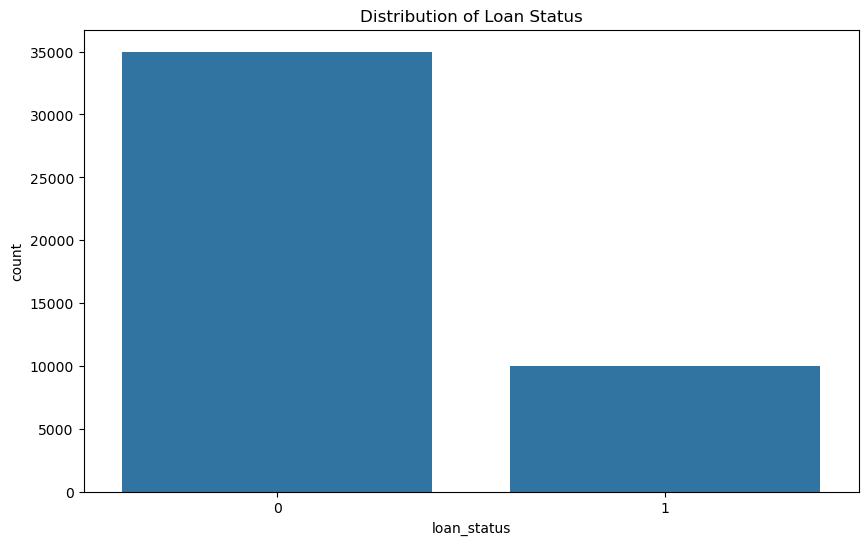

loan_status
0    35000
1    10000
Name: count, dtype: int64


In [18]:
# Plot the distribution of loan_status
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='loan_status')
plt.title('Distribution of Loan Status')
plt.show()

# Print the count of each class
print(data['loan_status'].value_counts())

In [11]:
print(data['loan_status'].value_counts(normalize=True))

loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64


### Target Variable Analysis
The chosen target variable for the Logistic Regression is loan_status. Loan_status is a dummy variable with selections that indicate loan approval as 1, and loan rejections as 0. 

Loan approvals make up 10,000 cases (20%), while rejections account for 35,000 cases (80%). This indicates imbalance that will need to be addressed through class weights in the Logistic Regression model.

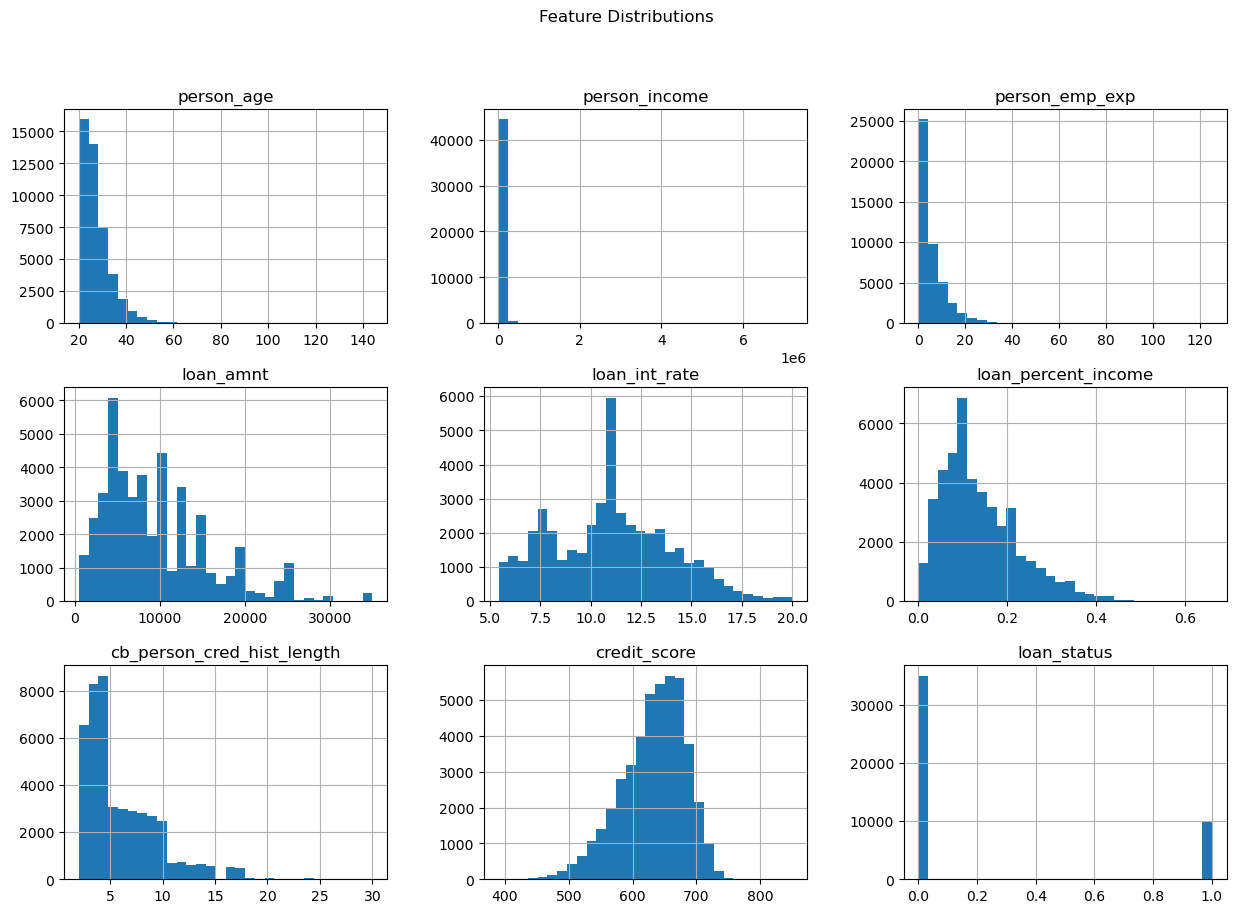

In [13]:
### Examining Distributions of Numerical Features
# Histograms for numerical features
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

### Feature Distributions:
Features such as person_age, person_income, and person_emp_exp, are right-skewed, meaning the bulk of the data is concentrated on the lower end of these values. This indicates that most individuals in this data set fall within a lower range for these attributes.

# Data Preprocessing

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [21]:
#checking for duplicates
print(data.duplicated().sum())

0


In [23]:
#getting unique values for categorical columns
print(data['person_gender'].unique())
print(data['person_education'].unique())
print(data['person_home_ownership'].unique())
print(data['loan_intent'].unique())
print(data['previous_loan_defaults_on_file'].unique())

['female' 'male']
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
['No' 'Yes']


In [20]:
# Encoding all the categorical variables using label encoder so that our data can pass through our model

# importing
from sklearn.preprocessing import LabelEncoder

# checking the different values in our categorical columns
for col in data.columns[data.dtypes=='object']:
    print(data[col].value_counts(),'\n')

person_gender
male      24841
female    20159
Name: count, dtype: int64 

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64 

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64 

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64 

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64 



In [21]:
# Encoding the above columns using label encoder
le=LabelEncoder()
for col in data.columns[data.dtypes=='object']:
    data[col]=le.fit_transform(data[col])

In [22]:
#Checking data has been encoded
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int32  
 2   person_education                45000 non-null  int32  
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  int32  
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  int32  
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

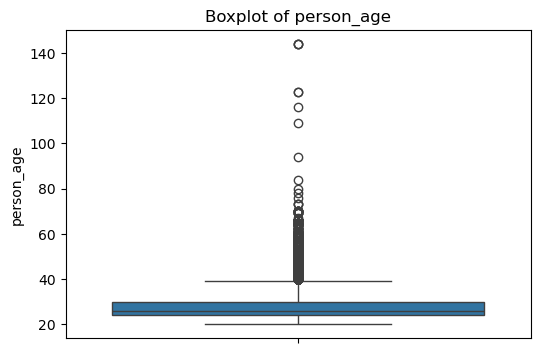

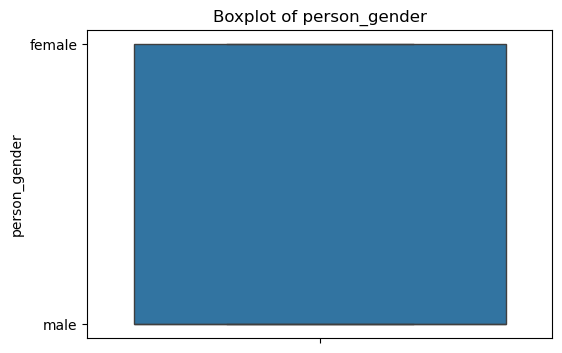

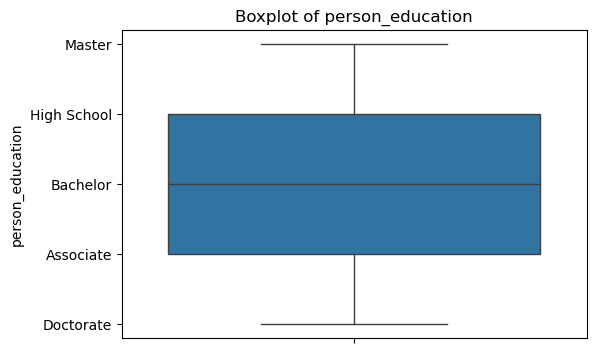

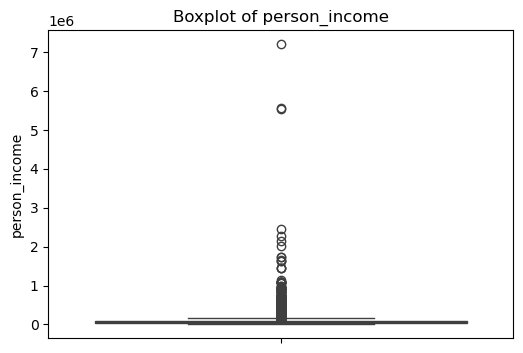

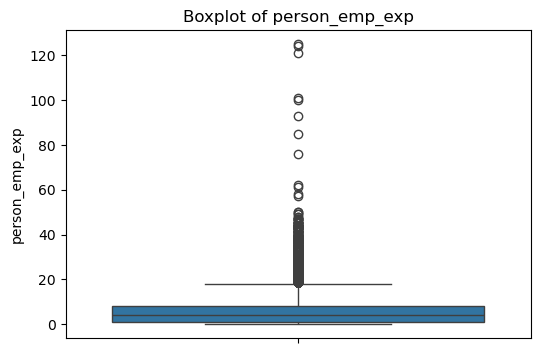

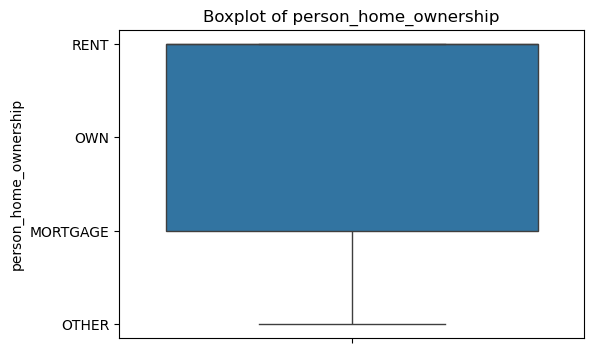

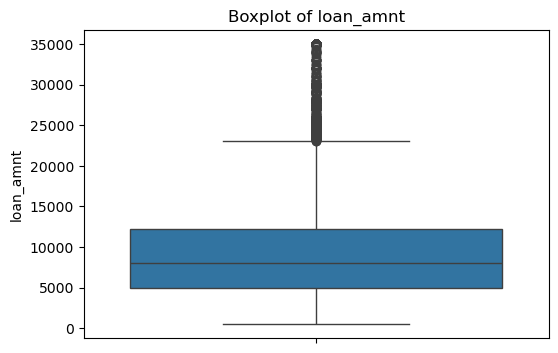

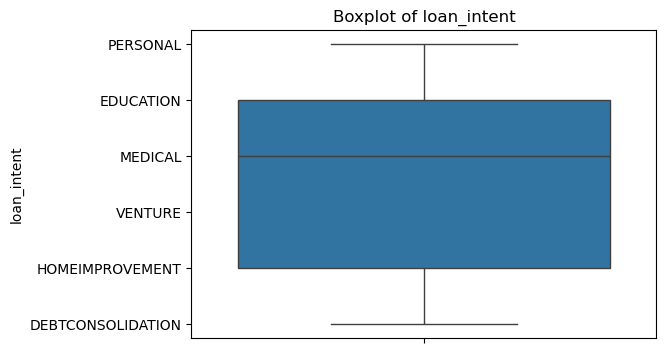

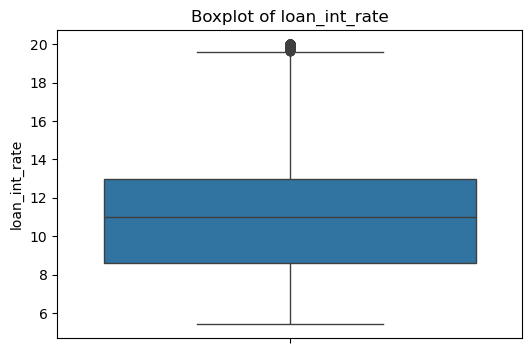

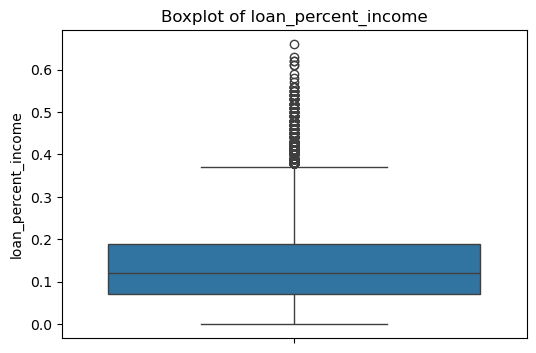

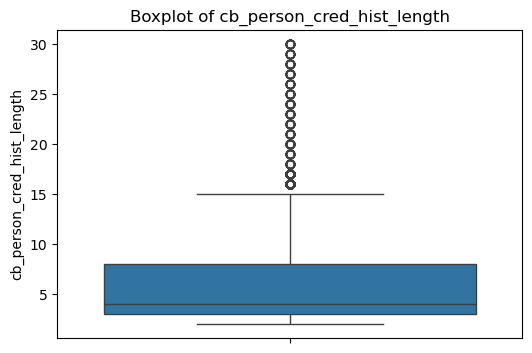

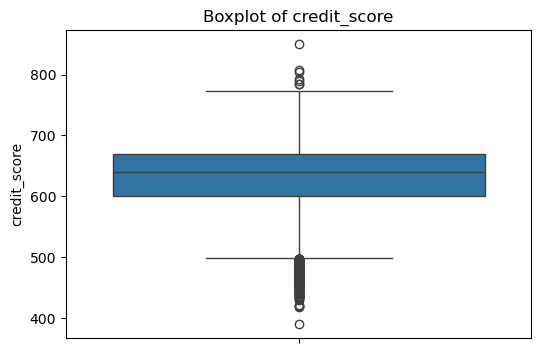

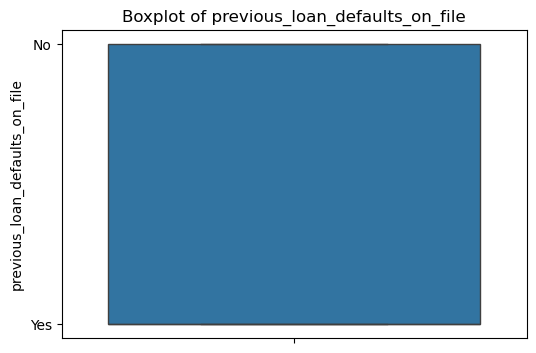

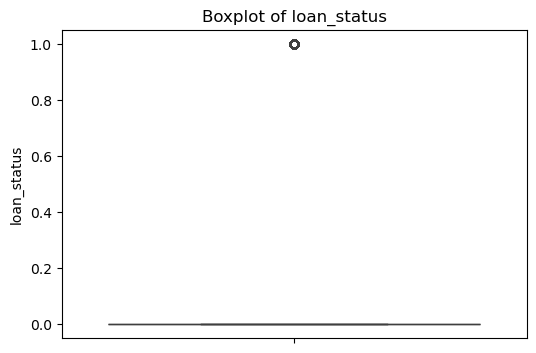

In [39]:
# Boxplots for scores
features = data.columns.tolist()

# Create separate box plots for each feature
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

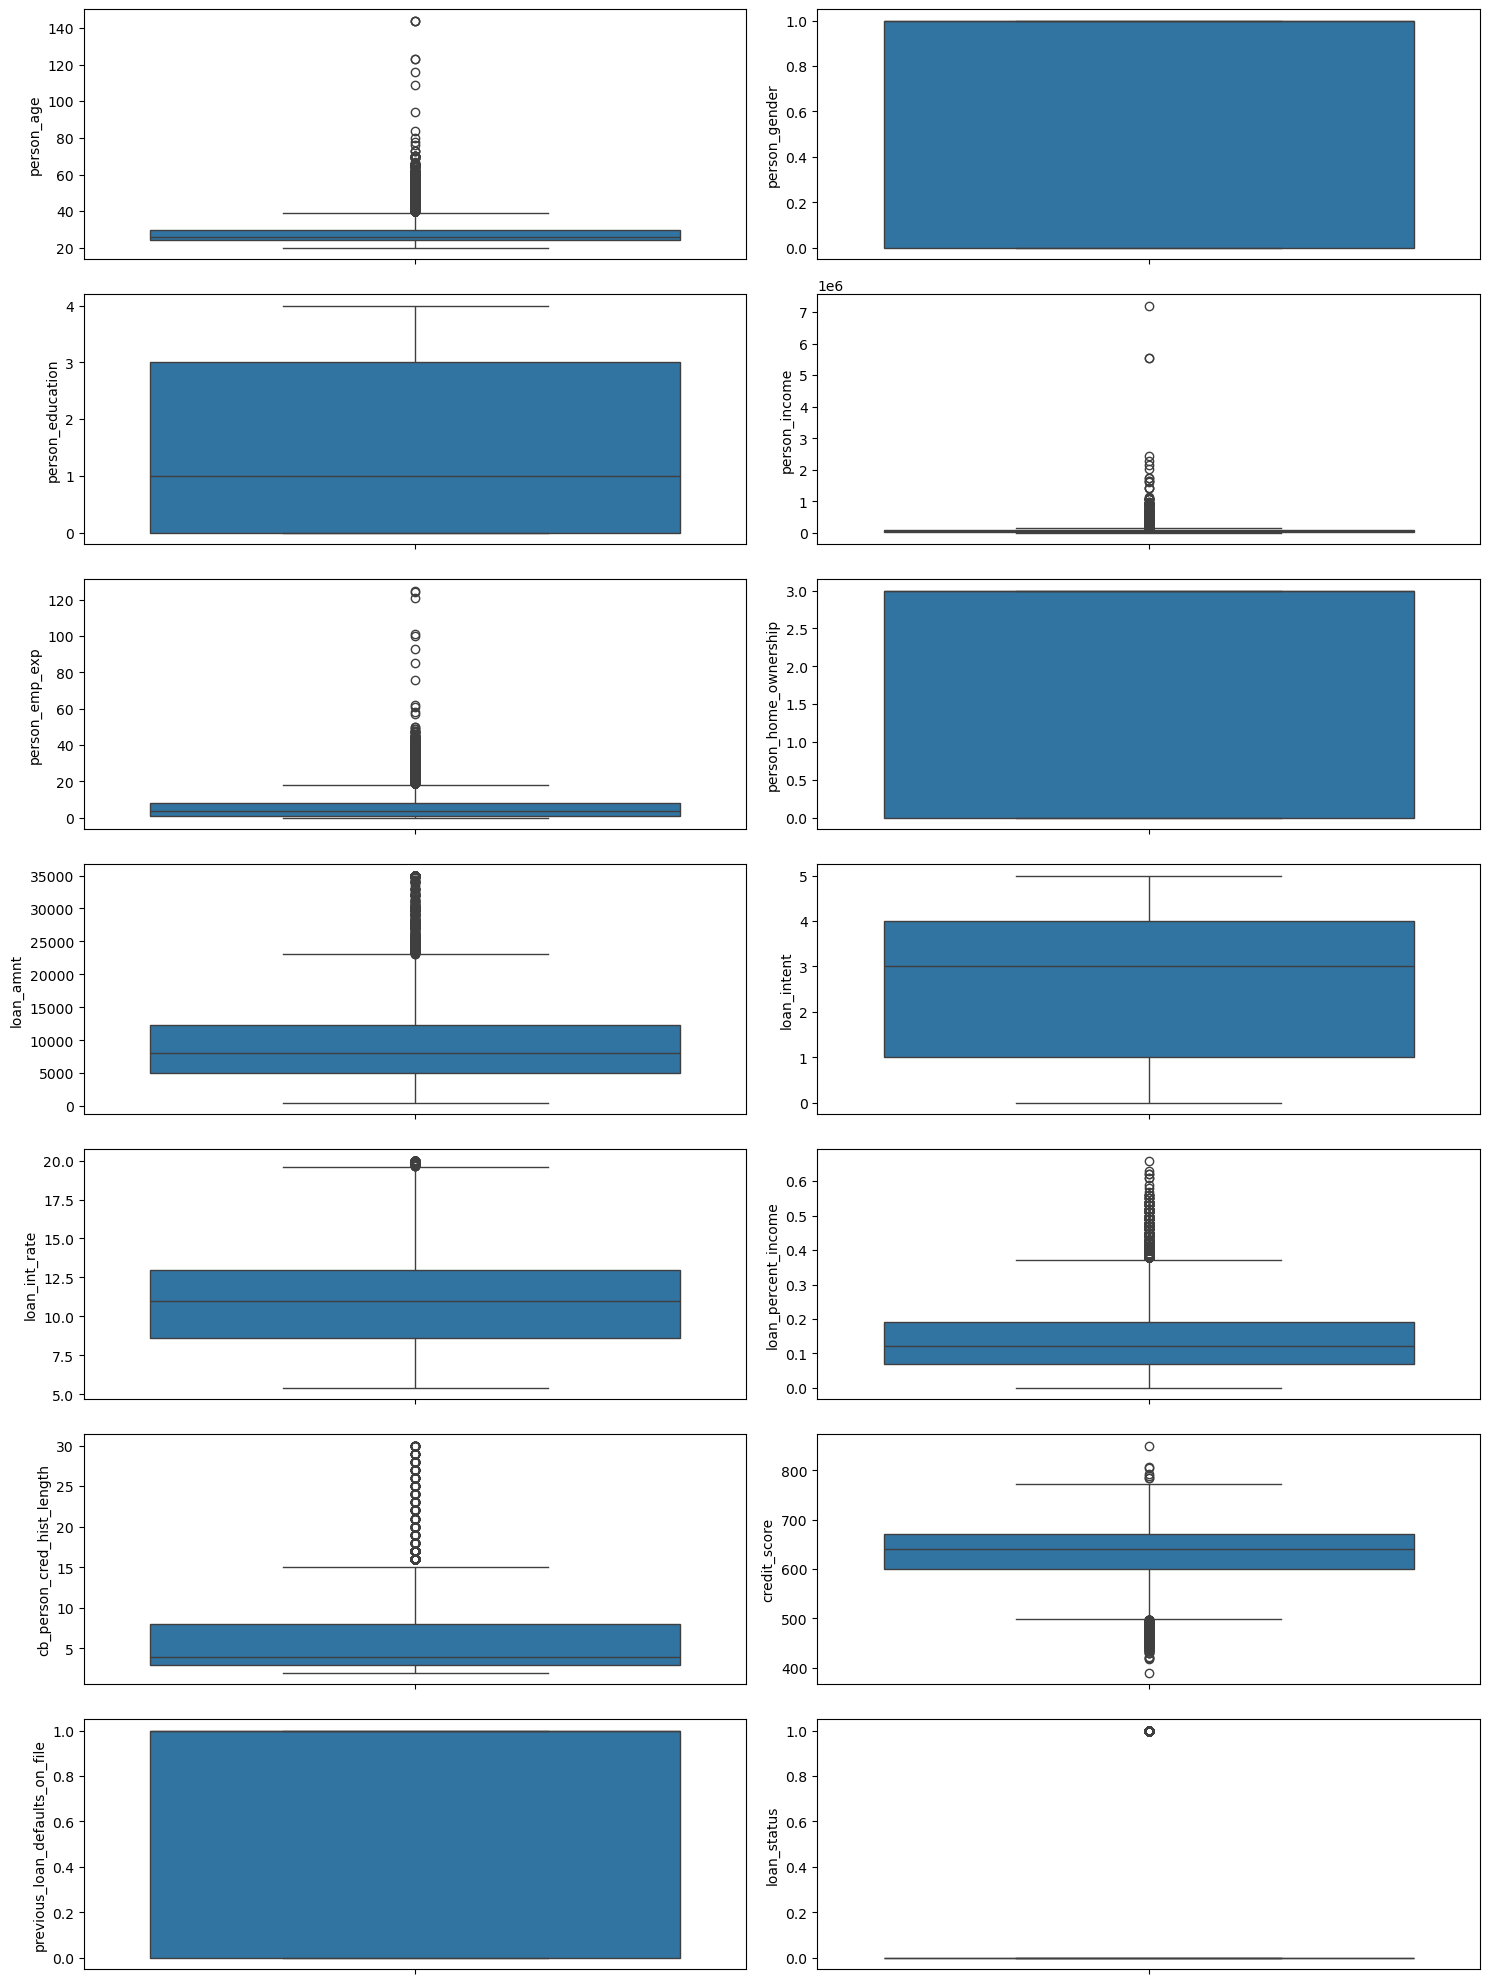

In [23]:
#Visualizing outliers with box plots
fig,ax=plt.subplots(7,2,figsize=(15,20))
ax=ax.flatten()
i=0
for col in data.columns:
    if i<len(ax):
        sns.boxplot(data=data,y=col,ax=ax[i])
        i+=1
plt.tight_layout()
plt.show()

In [41]:
#Identifying and removing outliers

cols=['person_age','person_income','person_emp_exp','loan_amnt','loan_percent_income',
      'loan_int_rate','cb_person_cred_hist_length','credit_score']

for col in cols:
    q1=data[col].quantile(0.25) # 1st quartile
    q3=data[col].quantile(0.75) # 3rd quartile
    iqr=q3-q1 # inter quartile range
    lb=q1-1.5*iqr # lower bound
    ub=q3+1.5*iqr # Upper Bound
    data=data[(data[col]>=lb) & (data[col]<=ub)]

In [43]:
#confirming clean and encoded data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36063 entries, 1 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      36063 non-null  float64
 1   person_gender                   36063 non-null  object 
 2   person_education                36063 non-null  object 
 3   person_income                   36063 non-null  float64
 4   person_emp_exp                  36063 non-null  int64  
 5   person_home_ownership           36063 non-null  object 
 6   loan_amnt                       36063 non-null  float64
 7   loan_intent                     36063 non-null  object 
 8   loan_int_rate                   36063 non-null  float64
 9   loan_percent_income             36063 non-null  float64
 10  cb_person_cred_hist_length      36063 non-null  float64
 11  credit_score                    36063 non-null  int64  
 12  previous_loan_defaults_on_file  36063

# Feature Engineering

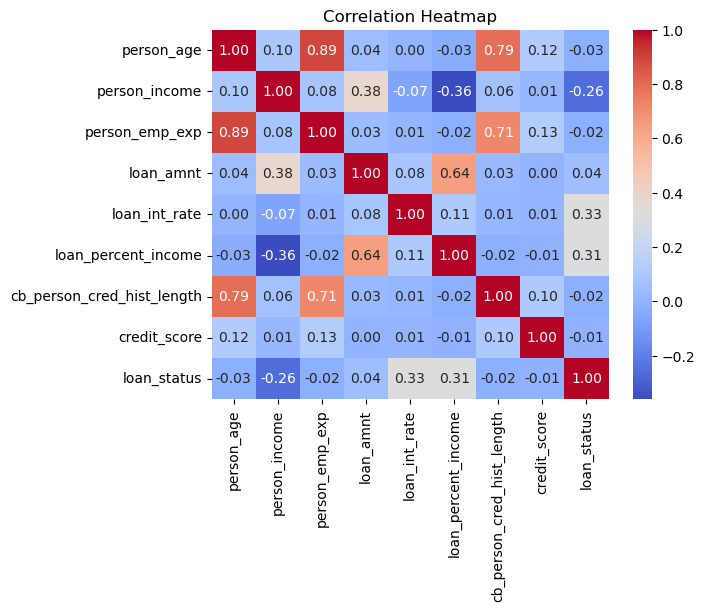

In [53]:
# Select only numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64', 'int32'])

# Compute correlations
correlation_matrix = numeric_columns.corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Correlation Analysis
Checking correlations to identify potential multicollinearity between features and the target variable.

Loan_status (the target variable) has a strong positive correlation with boloan_int_rateore (3.32) and loan_percent_income 31.28). This suggests that highinterest ratesres increase loan approval chances and loans that take a lower percentage of income are more likely to be approved.

Strong correlations exist between person_age, person_emp_ex9(0.86) and cb_person_cred_hist_length9(0.75), indicating that older individuals tend to have more employment experience and longer credit histories, which may affect model interpretatns.



# Model Building

In [81]:
#Baseline Model
import statsmodels.formula.api as smf

explore_function = 'loan_status ~ loan_amnt + loan_percent_income + loan_int_rate + credit_score + person_income + cb_person_cred_hist_length'

explore_model = smf.logit(explore_function, data=data)
explore_results = explore_model.fit()

print(explore_results.summary())

Optimization terminated successfully.
         Current function value: 0.382092
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                36063
Model:                          Logit   Df Residuals:                    36056
Method:                           MLE   Df Model:                            6
Date:                Wed, 08 Jan 2025   Pseudo R-squ.:                  0.2408
Time:                        11:23:16   Log-Likelihood:                -13779.
converged:                       True   LL-Null:                       -18150.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -5.9784      0.232    -25.733      0.000      

In [83]:
#Refined Model

nonsig_function = 'loan_status ~ loan_amnt + loan_percent_income + loan_int_rate'

nonsig_model = smf.logit(nonsig_function, data=data)
nonsig_results = nonsig_model.fit()
print(nonsig_results.summary())

Optimization terminated successfully.
         Current function value: 0.382175
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                36063
Model:                          Logit   Df Residuals:                    36059
Method:                           MLE   Df Model:                            3
Date:                Wed, 08 Jan 2025   Pseudo R-squ.:                  0.2406
Time:                        11:23:18   Log-Likelihood:                -13782.
converged:                       True   LL-Null:                       -18150.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -6.4470      0.083    -77.638      0.000      -6.610      -6.284
lo

In [85]:
#Calculate VIF for each predictor in refined model
X_refined = data[['loan_amnt','loan_percent_income', 'loan_int_rate']]

vif_data_refined = pd.DataFrame()
vif_data_refined['Feature'] = X_refined.columns
vif_data_refined['VIF'] = [variance_inflation_factor(X_refined.values, i) for i in range(X_refined.shape[1])]

print(vif_data_refined)

               Feature       VIF
0            loan_amnt  6.618440
1  loan_percent_income  7.164422
2        loan_int_rate  4.195114


In [87]:
#Removing loan_amount from model due to high VIF and scaling Person_income due to low coefficient
data['person_income_scaled'] = data['person_income'] / 1000

final_function = 'loan_status ~ loan_percent_income + loan_int_rate + person_income_scaled'

final_model = smf.logit(final_function, data=data)
final_results = final_model.fit()
print(final_results.summary())

Optimization terminated successfully.
         Current function value: 0.386534
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                36063
Model:                          Logit   Df Residuals:                    36059
Method:                           MLE   Df Model:                            3
Date:                Wed, 08 Jan 2025   Pseudo R-squ.:                  0.2320
Time:                        11:23:29   Log-Likelihood:                -13940.
converged:                       True   LL-Null:                       -18150.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.0116      0.089    -56.069      0.000      -5.187      -4.836

In [89]:
#Calculate VIF for each predictor in final model
X_final = data[['loan_percent_income', 'loan_int_rate', 'person_income_scaled']]

vif_data_final = pd.DataFrame()
vif_data_final['Feature'] = X_final.columns
vif_data_final['VIF'] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

print(vif_data_final)

                Feature       VIF
0   loan_percent_income  3.861158
1         loan_int_rate  7.687053
2  person_income_scaled  4.258752


#### Model Process
Logistic Regression was chosen as the model for our objective due to the target variable being binary. Since loan_status has two categories, approved (1) and rejected (0), a logistic regression is a natural fit to assess the probability of an observation belonging to one of these two categories.

I first created a baseline logistic regression model that included variables that intuitively impacted loan approval. I then refined the model to remove insignificant features from the baseline model. I calculated the VIF of the features included in the refined model and removed loan_amnt and scaled person_income before testing the final model. 

#### Final Model Key Insights
1. With a pseudo R-squared 2790.2185, the model expla3ns ~22% of the variability in loan_status. While not perfect, this is expected for logistic regression with a complex problem like loan approval.
2. Loan Percent Income is by far the most influential factor. This might seem counterintuitive, but it could suggest that borrowers seeking loans proportional to their income are perceived as more responsible or manageable.
3. Larger loan amounts are less likely to be approved, reflecting that higher loans may have stricter underwriting standards.
4. Higher interest rates increase the likelihood of loan approval. This could be because loans with higher rates are more profitable for lenders which would make them more willing to approve these applications.
5. Since the VIFs are all under or close to 5, it suggests that multicollinearity is not severe and won't significantly affte model




# Model Visualizations and Evaluations

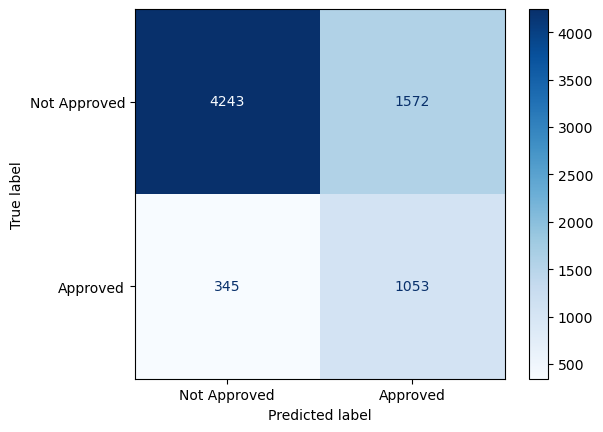

Model Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.82      5815
           1       0.40      0.75      0.52      1398

    accuracy                           0.73      7213
   macro avg       0.66      0.74      0.67      7213
weighted avg       0.82      0.73      0.76      7213



In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data[['loan_percent_income', 'loan_int_rate', 'person_income']]
y = data['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Not Approved", "Approved"], cmap='Blues')
plt.show()

# Accuracy Score
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

#### Confusion Matrix
1. The model achieved 73% accuracy in correctly predicting the loan status of the cases in the dataset. This indicated a strong overall performance in terms of correct classifications.
2. High precision (92%) and good recall (73%) for class 0 (rejected) indicate that the model is effective at identifying loans that should not be approved. High recall (75%) for class 1 (approved) shows that the model is sensitive to detecting approved loans which is critical for minimizing the risk of missing potential loan approvals.
3. Low precision (40%) for class 1 indicates that the model has a high number of false positives which has the potential of leading to incorrectly approved loans.

While the model performs well overall, addressing class imbalance in the future would improve the precision for approved loans (1) and offer better reliability for real-world applications.

In [95]:
# Calculating Odds Ratios
coefficients = final_results.params[final_results.pvalues < 0.05]

odds_ratios = np.exp(coefficients)

# Create a DataFrame for clarity
odds_ratios_df = pd.DataFrame({
    'Coefficient': coefficients.values,
    'Odds Ratio': odds_ratios
})

print(odds_ratios_df)

                      Coefficient   Odds Ratio
Intercept               -5.011555     0.006661
loan_percent_income      8.540702  5118.937799
loan_int_rate            0.321328     1.378958
person_income_scaled    -0.021445     0.978783


#### Coefficients and Odds Ratios
1. Loan_percent_income: For every one-unit increase, multiplies the odds of loan approval by a factor of5118.94. This suggests that the proportion of income required for the loan is a highly influential factor in determining loan approval.
2. Loan_int_rate: For every one-unit increase, the odds of loan approval increase by 38%. This implies that the lender is compensating for risk by increasing the interest rate while still approving the loan.
3. Person_income: For every one-unit increase, the odds of loan approval decreaby 2.1%tly. ely small negative coefficient indicates that incoslightly decreasesnct the approval likelihood of aan.




# Conclusion
### Summary of Findings:
1. The final logistic model performed well in predictive loan approvals and rejections, achieving an accuracy of 84%.
2. The predicted probabilities of the model showed reasonable separation and was reflected in the confusion matrix, classification report, and ROC-AUC score.
3. The most significant predictor was Loan Percent Income. Higher percentages strongly correlate with an increase in approval probability and suggest that affordability is a crucial factor in loan decisions.
4. Loan Interest Rate had a moderate positive impact on loan approval. Counterintuitively, this indicates that loans with higher interest rates are more likely to be approved. This indicates that lenders are compensating for risk with increased interest rates.
5. Although a significant parameter in determining loan approvals, Person Income had a very small influence on approval probability.
   
### Business Implications:
1. The model helps to provide lenders with a framework for automating loan approval decisions. By focusing on loan_percent_income, lenders are able to identify applicants that are most likely to afford their loans, reducing the risk of default.
2. The model optimizes profit with the inclusion of loan_int_rate that balances approval decisions with profitability.
3. The model creates a way for lenders to target applicants that meet certain thresholds for loan_percent_income and/or loan_int_rate. Prioritizing applicants that meet these thresholds can increase efficiency and repleelationships.


